In [45]:
# Importing Libraries
from google.colab import files
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.arima_model as smzs
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# files.upload()

In [47]:
# Loading the data
def load_data(file_path):
    df = pd.read_excel(file_path)
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df

In [48]:
df = load_data("Jamaica Public Service Quaterly Stock Price.xlsx")

In [49]:
df.head()

,Closing Price
Date,
2023-08-24,50.00
2023-08-25,53.51
2023-08-26,53.51
2023-08-27,53.51
2023-08-28,53.51


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2023-08-24 to 2023-11-26
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [51]:
print(df.columns)

Index(['Closing Price'], dtype='object')


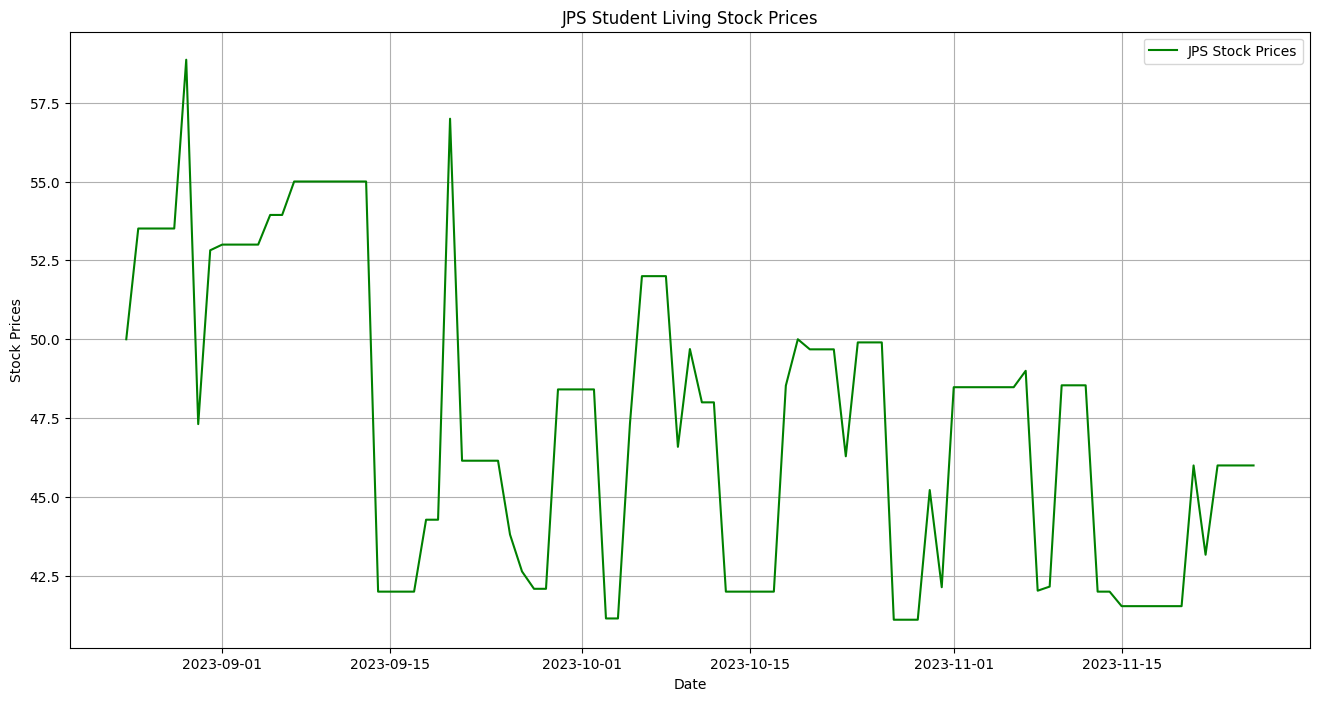

In [52]:
plt.figure(figsize=(16, 8))
plt.plot(df['Closing Price'], label='JPS Stock Prices', color='green')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('JPS Student Living Stock Prices')
plt.legend()
plt.show()


In [53]:
# Check data for Stationarity using the Augmented Dickey Fuller (ADF) Test
def check_stationarity(df):
    adf_result = adfuller(df)
    return adf_result[1] <= 0.05

# Initializing a counter
differencing_count = 0

# Continuing differencing until the p-value is less than the level of significance
df_diff = df.copy()
while not check_stationarity(df_diff):
    df_diff = df_diff.diff().dropna()


    differencing_count += 1

# Printing the number of differencing iterations
print(f'Number of differencing iterations: {differencing_count}')

Number of differencing iterations: 0


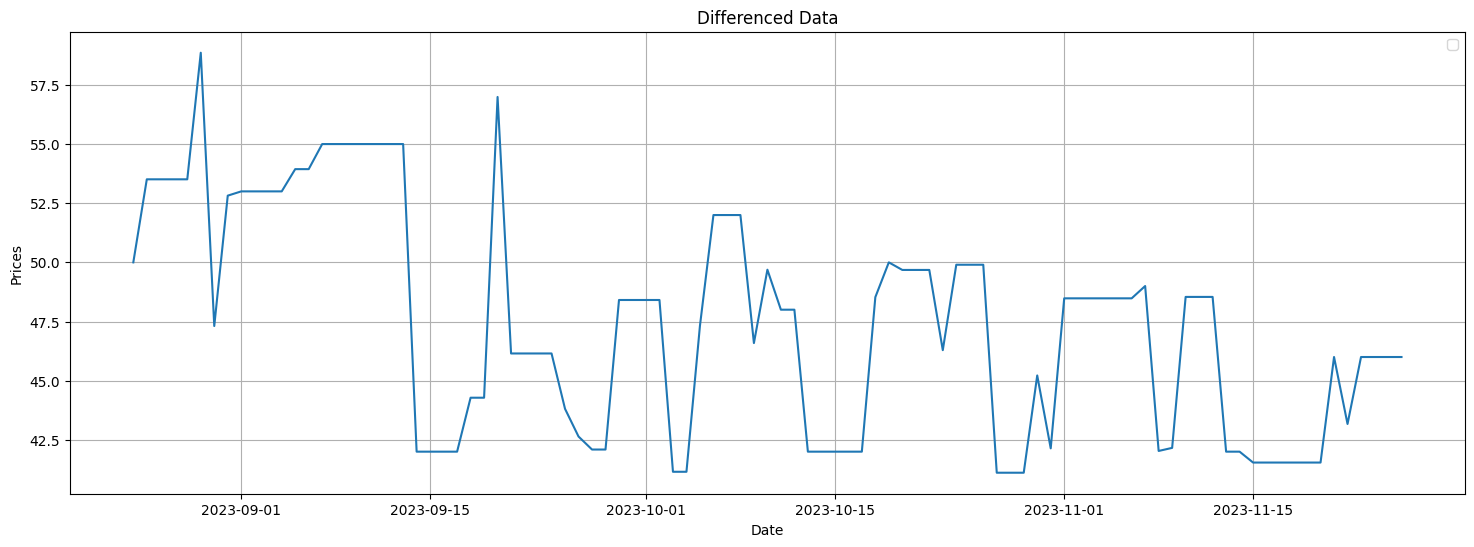

In [54]:
# Plotting the differenced data
plt.figure(figsize=(18,6))
plt.plot(df_diff)
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid()
plt.legend()
plt.show()

In [55]:
# Test to check the stationary of the differenced time series
adf_result = adfuller(df_diff)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
# The code shows that the p-value is less than the level of significance (alpha = 0.05).
# This shows that the differenced data is stationary.
# Rule: Accept the Alternative Hypothesis - HA to conclude that there is evidence that the data is stationary.

ADF Statistic: -4.0694731152822605
p-value: 0.0010873801756072908


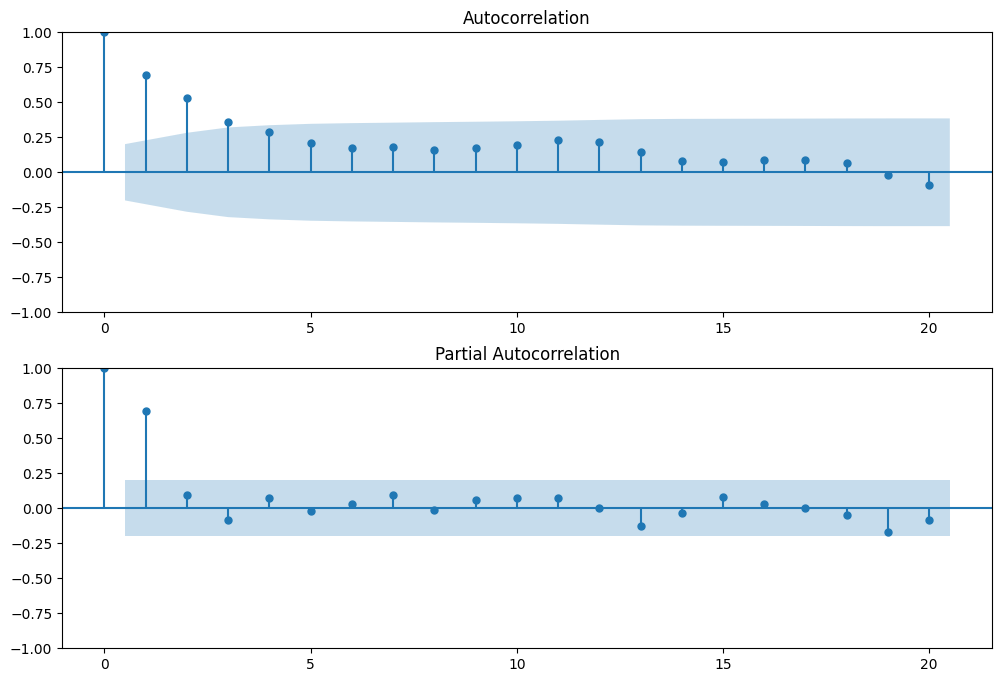

In [56]:
# Determining the AR (AutoRegressive) & MA (Moving Average) parameters using the ACF & PACF.

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df_diff, lags=20, ax=ax1)
plot_pacf(df_diff, lags=20, ax=ax2)
plt.show()


In [57]:
# Initializing an ARIMA Model
model = ARIMA(df, order=(1, 0, 1))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


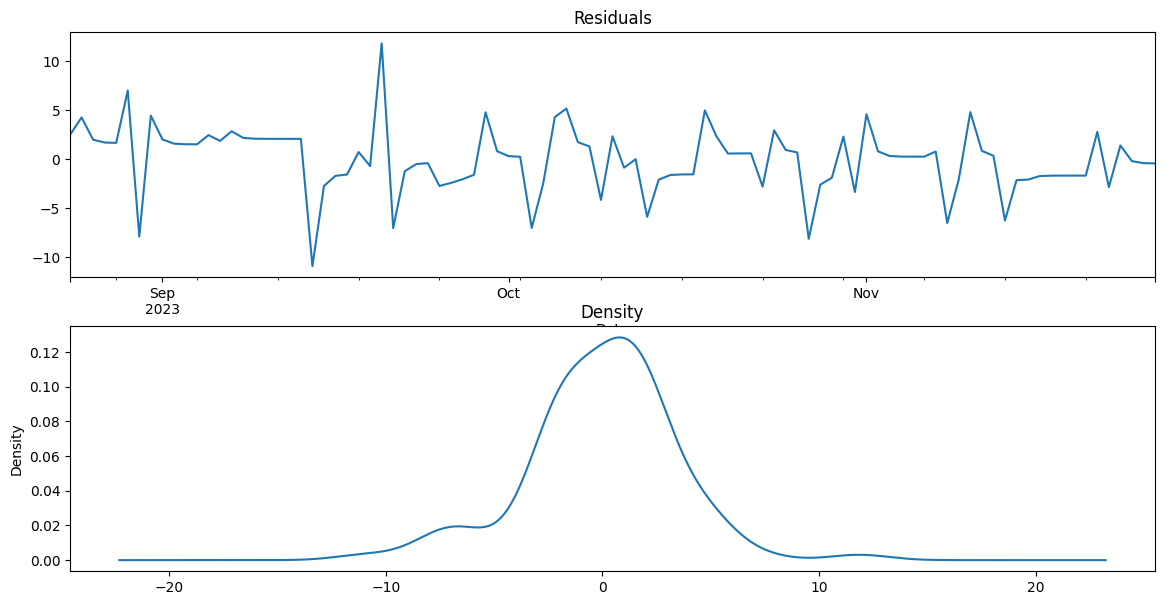

In [58]:
# Plotting the residuals
plt.figure(figsize=(14, 7))
plt.subplot(211)
result.resid.plot(title='Residuals', ax=plt.gca())
plt.subplot(212)
result.resid.plot(kind='kde', title='Density', ax=plt.gca())
plt.show()

<Figure size 1000x500 with 0 Axes>

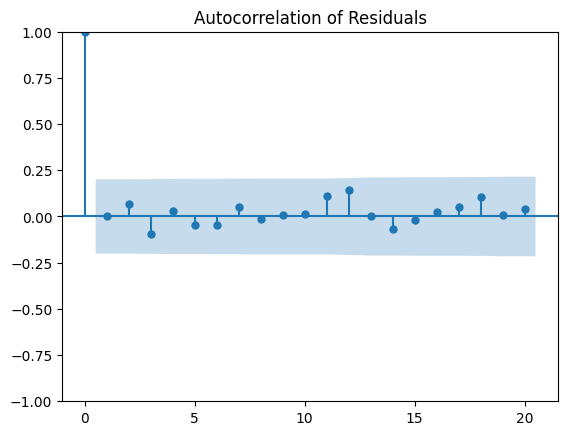

In [59]:
# Plotting the autocorrelation of the residuals to check for any remaining patterns or structures in the data that the model may not have captured
plt.figure(figsize=(10, 5))
plot_acf(result.resid, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()


In [60]:
# # Forecasting the next 5 steps using an ARIMA model, obtaining predicted mean values and confidence intervals.

forecast_results = result.get_forecast(steps=5)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
# Printing the values
print(forecast_results)
print(forecast_mean)
print(conf_int)


2023-11-27    46.418697
2023-11-28    46.682861
2023-11-29    46.882698
2023-11-30    47.033873
2023-12-01    47.148235
Freq: D, Name: predicted_mean, dtype: float64
            lower Closing Price  upper Closing Price
2023-11-27            39.818323            53.019071
2023-11-28            38.882061            54.483661
2023-11-29            38.471650            55.293747
2023-11-30            38.292740            55.775006
2023-12-01            38.223693            56.072777


In [61]:
import itertools

# Definimg sets of (p, d, q) values for the ARIMA model
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Generating all possible combinations of (p, d, q)
orders = list(itertools.product(p_values, d_values, q_values))

# Initializing a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['ORDER', 'AIC', 'BIC', 'MSE'])

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

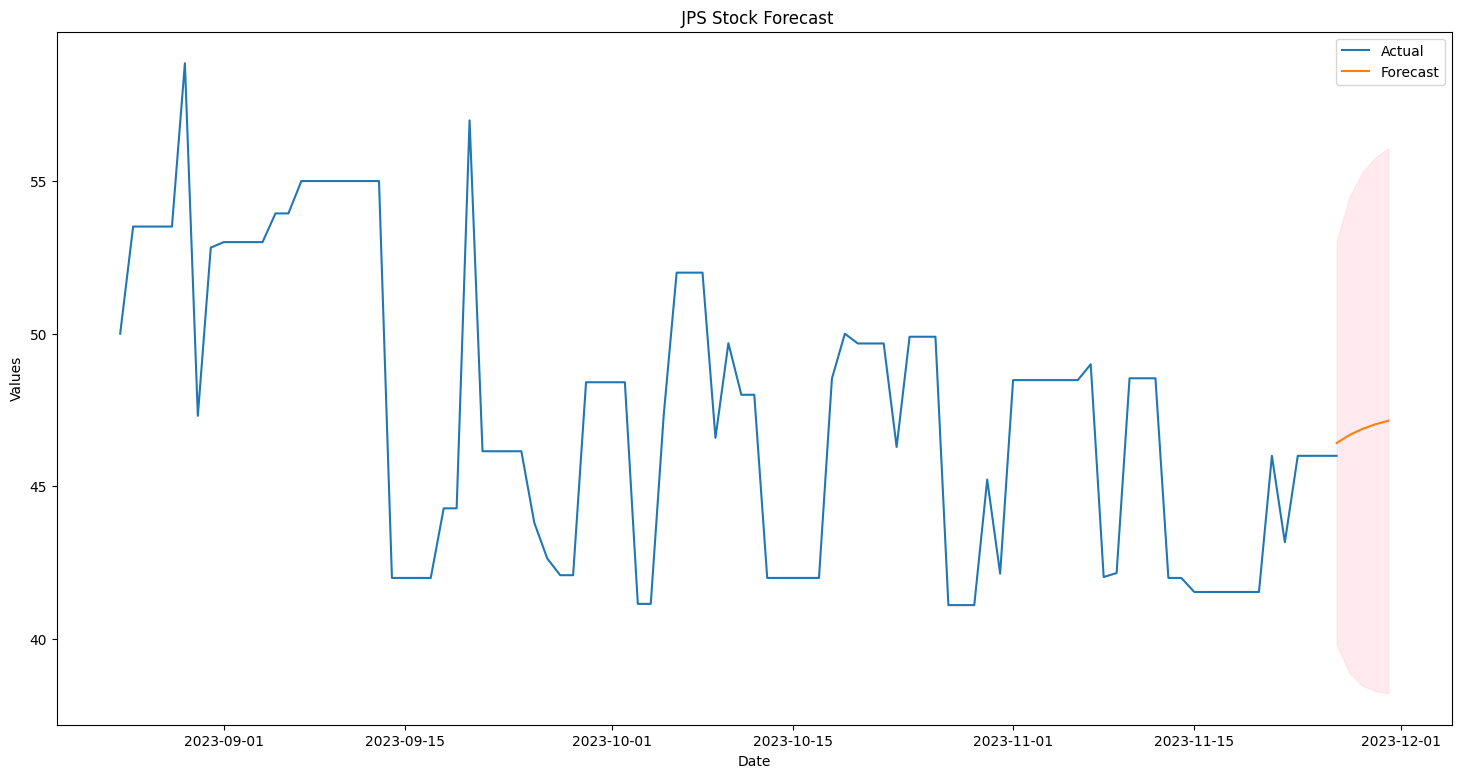

In [62]:
# Generating forecasts and plot results
forecast_results = result.get_forecast(steps=5)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plotting actual vs. forecast with their confidence intervals
plt.figure(figsize=(18, 9))
plt.plot(df['Closing Price'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=5, freq='D'), forecast_mean, label='Forecast')
plt.fill_between(pd.date_range(start=df.index[-1], periods=5, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(' JPS Stock Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


In [63]:
# Fitting the models to compute the AIC, BIC, MSE
for order in orders:
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    aic = model_fit.aic
    bic = model_fit.bic

    # Forecasting the model
    forecast_steps = len(test_data)
    forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean
    mse = mean_squared_error(test_data, forecast)

    # Storing Results
    results_df = results_df.append({'Order': order, 'AIC': aic, 'BIC': bic, 'MSE': mse}, ignore_index=True)

# Printing the results
print(results_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-63-54cd5ed83860>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Order': order, 'AIC': aic, 'BIC': bic, 'MSE': mse}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

   ORDER         AIC         BIC         MSE      Order
0    NaN  455.697588  460.359054   25.624734  (0, 0, 0)
1    NaN  430.893432  437.885632   25.859632  (0, 0, 1)
2    NaN  418.038272  427.361206   26.087808  (0, 0, 2)
3    NaN  417.007543  419.325031   31.942095  (0, 1, 0)
4    NaN  413.412199  418.047176   30.410878  (0, 1, 1)
5    NaN  414.849684  421.802148   28.642734  (0, 1, 2)
6    NaN  480.443906  482.747971  117.813253  (0, 2, 0)
7    NaN  418.784399  423.392529   30.666517  (0, 2, 1)
8    NaN  415.920485  422.832681   27.841029  (0, 2, 2)
9    NaN  412.593492  419.585692   26.703780  (1, 0, 0)
10   NaN  413.888785  423.211718   27.014483  (1, 0, 1)
11   NaN  414.978162  426.631829   26.688117  (1, 0, 2)
12   NaN  413.826526  418.461502   30.874515  (1, 1, 0)
13   NaN  409.161245  416.113710   18.529465  (1, 1, 1)
14   NaN  410.850145  420.120097   18.848012  (1, 1, 2)
15   NaN  446.786346  451.394476   75.588524  (1, 2, 0)
16   NaN  416.115256  423.027451   28.635326  (1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-63-54cd5ed83860>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Order': order, 'AIC': aic, 'BIC': bic, 'MSE': mse}, ignore_index=True)


In [64]:
# Finding the model with the best AIC, BIC and MSE

best_aic_model = results_df.loc[results_df['AIC'].idxmin()]
best_bic_model = results_df.loc[results_df['BIC'].idxmin()]
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]

print(f'The best AIC model : {best_aic_model}')
print(f'The best BIC model : {best_bic_model}')
print(f'The best MSE Model : {best_mse_model}')


The best AIC model : ORDER           NaN
AIC      409.161245
BIC       416.11371
MSE       18.529465
Order     (1, 1, 1)
Name: 13, dtype: object
The best BIC model : ORDER           NaN
AIC      409.161245
BIC       416.11371
MSE       18.529465
Order     (1, 1, 1)
Name: 13, dtype: object
The best MSE Model : ORDER           NaN
AIC      409.161245
BIC       416.11371
MSE       18.529465
Order     (1, 1, 1)
Name: 13, dtype: object


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


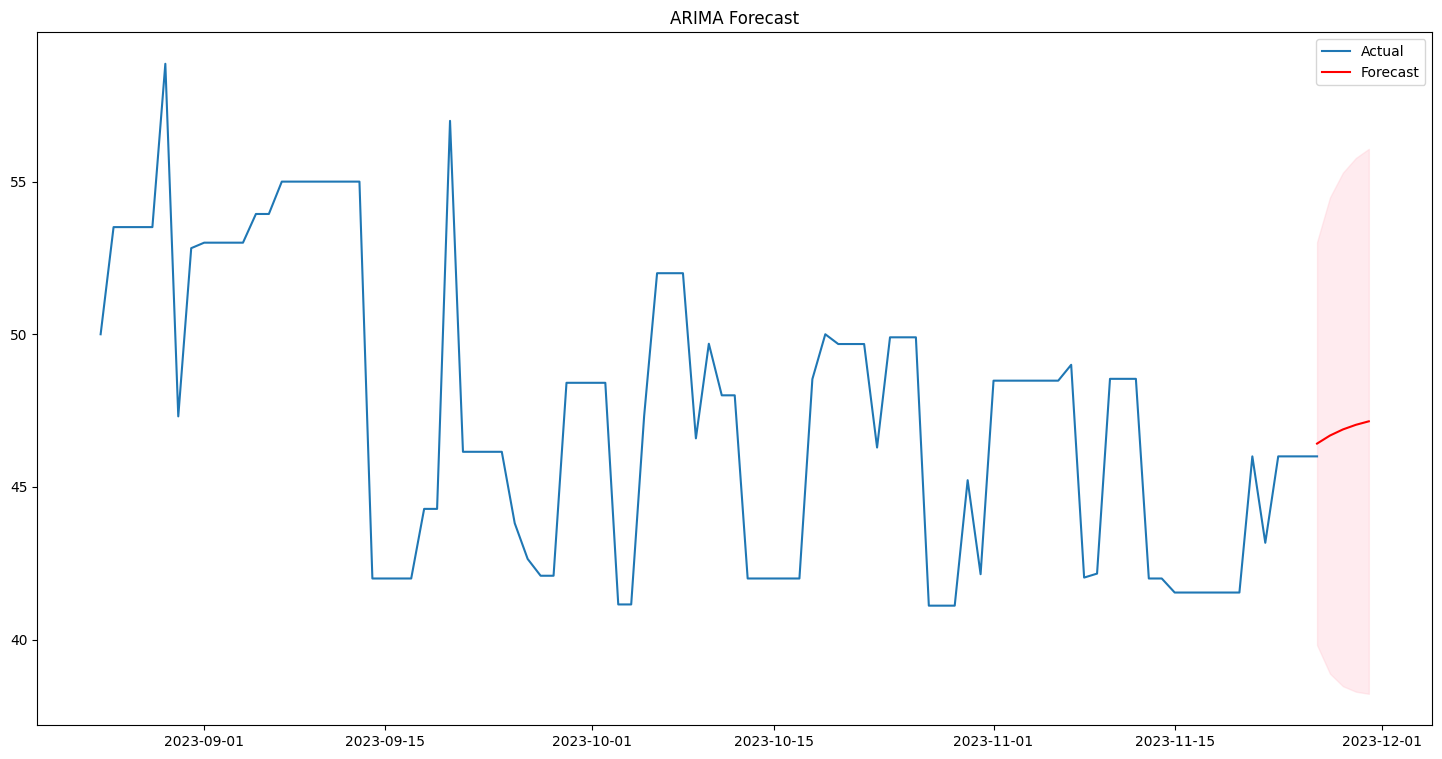

In [65]:
# # Creating a date range for the forecast period based on the last timestamp in the dataset

# Fitting the best model on the training data
best_order = (1,0,0) # Ignoring the values under AIC, BIC, and MSE, as differening
best_model= ARIMA(df,order=best_order)
best_model_fit = best_model.fit()

# Forecasting 5 years into the future
forecast_results = best_model_fit.get_forecast(steps=5)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Creating a new date range for the forecast period
forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='D')

# Assigning the forecast index
forecast_mean.index = forecast_index
conf_int.index = forecast_index

# Plotting the original data and the forecast
plt.figure(figsize=(18,9))
plt.plot(df, label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)

plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [66]:
# Generating forecasts with the AIC model and printing results
forecast_results2 = best_model_fit.get_forecast(steps=5)
forecast_mean2 = forecast_results2.predicted_mean
conf_int2 = forecast_results2.conf_int()
print(forecast_results2)
print(forecast_mean2)
print(conf_int2)

2023-11-27    46.418697
2023-11-28    46.682861
2023-11-29    46.882698
2023-11-30    47.033873
2023-12-01    47.148235
Freq: D, Name: predicted_mean, dtype: float64
            lower Closing Price  upper Closing Price
2023-11-27            39.818323            53.019071
2023-11-28            38.882061            54.483661
2023-11-29            38.471650            55.293747
2023-11-30            38.292740            55.775006
2023-12-01            38.223693            56.072777


In [67]:
from tabulate import tabulate
# Evaluating the model on the training set

train_forecast = best_model_fit.get_forecast(steps=len(train_data)).predicted_mean
train_mae = mean_absolute_error(train_data, train_forecast)
train_mse = mean_squared_error(train_data, train_forecast)
train_rmse = np.sqrt(train_mse)

# Evaluating the model on the testing set
forecast_results = best_model_fit.get_forecast(steps=len(test_data))
test_forecast = forecast_results.predicted_mean
test_mae = mean_absolute_error(test_data, test_forecast)
test_mse = mean_squared_error(test_data, test_forecast)
test_rmse = np.sqrt(test_mse)

# Organizing metrics in a tabular form
metrics_table = [
    ["Metric", "Training Set", "Testing Set"],
    ["Mean Absolute Error (MAE)", f"{train_mae:.2f}", f"{test_mae:.2f}"],
    ["Mean Squared Error (MSE)", f"{train_mse:.2f}", f"{test_mse:.2f}"],
    ["Root Mean Squared Error (RMSE)", f"{train_rmse:.2f}", f"{test_rmse:.2f}"],
]

# Printing the tabular form
print(tabulate(metrics_table, headers="firstrow", tablefmt="fancy_grid"))


╒════════════════════════════════╤════════════════╤═══════════════╕
│ Metric                         │   Training Set │   Testing Set │
╞════════════════════════════════╪════════════════╪═══════════════╡
│ Mean Absolute Error (MAE)      │           4.1  │          3.74 │
├────────────────────────────────┼────────────────┼───────────────┤
│ Mean Squared Error (MSE)       │          23.63 │         17.85 │
├────────────────────────────────┼────────────────┼───────────────┤
│ Root Mean Squared Error (RMSE) │           4.86 │          4.22 │
╘════════════════════════════════╧════════════════╧═══════════════╛
